## 神经网络（Neural networks）

### 计算图与反向传播

计算图：将神经网络的计算过程使用不同的节点表示，对于线性分类而言：
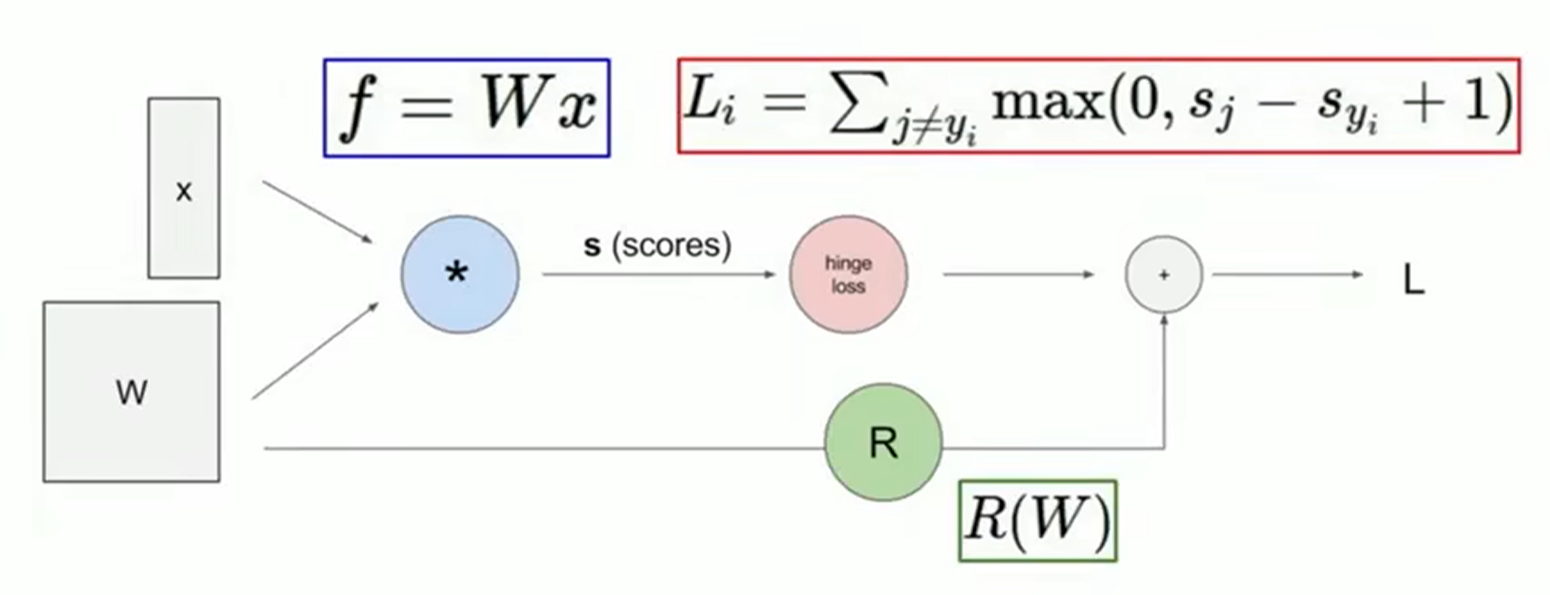
使用计算图可以很方便的使用反向传播算法来计算梯度

每个节点根据上游传递的梯度值，结合本地的参数计算梯度进行反向传播计算

> **example：**
>   $$f(x,W)=||W\cdot x||^2=\sum_{i=1}^n(Wx)_{\boldsymbol{i}}^2$$
>   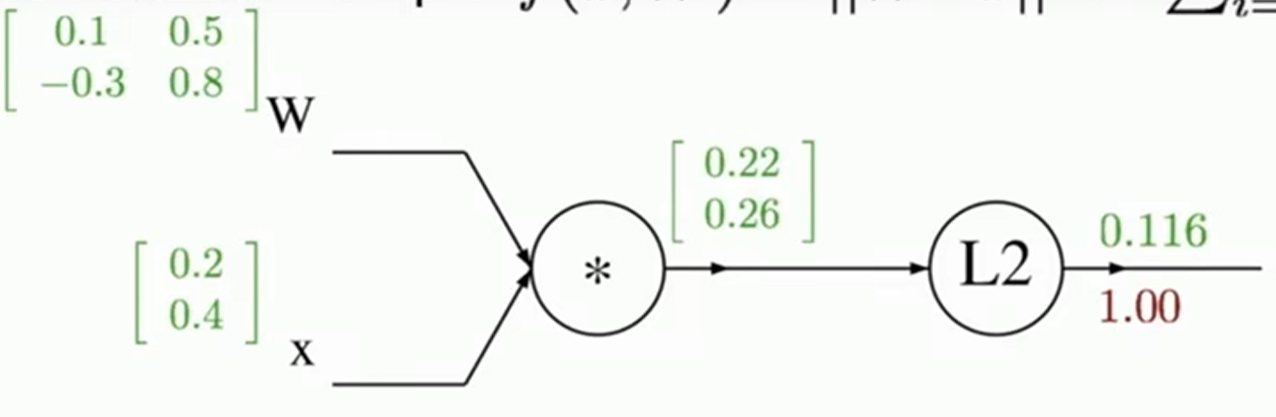
> $$\begin{aligned}
 & q=W\cdot x=
\begin{pmatrix}
{W_{1,1}x_{1}+\cdots+W_{1,n}x_{n}} \\
{\vdots} \\
{W_{n,1}x_{1}+\cdots+W_{n,n}x_{n}}
\end{pmatrix} \\
 & f(q)=||q||^2=q_1^2+\cdots+q_n^2
\end{aligned}$$
> - $\frac{\partial f}{\partial q}$
> > $\frac{\partial f}{\partial q_i}=2q_i$
> > 
> > $\frac{\partial f}{\partial q}=2q$
> - $\frac{\partial f}{\partial W}$
> > $$\begin{aligned}
 & \frac{\partial q_k}{\partial W_{i,j}}=\mathbf{1}_{k=i}x_j \\
  \\
 & \frac{\partial f}{\partial W_{i,j}}  =\sum_k\frac{\partial f}{\partial q_k}\frac{\partial q_k}{\partial W_{i,j}} 
  =\sum_k(2q_k)(\mathbf{1}_{k=i}x_j) 
 =2q_ix_j
\end{aligned}$$
> > $\nabla_Wf=2q\cdot x^T$
> - $\frac{\partial f}{\partial x}$
> > $\begin{gathered}
\frac{\partial q_k}{\partial x_i}=W_{k,i} \\
\frac{\partial f}{\partial x_i}=\sum_k\frac{\partial f}{\partial q_k}\frac{\partial q_k}{\partial x_i} \\
=\sum_{k}2q_{k}W_{k,i}
\end{gathered}$
> > $\nabla_xf=2W^T\cdot q$

[一篇有关于矩阵求导的参考文章](./vecDerivs.pdf)

一个乘法节点实现的例子：
```python
class Multiply(object):
    def forward(x,y):
        z = x * y
        self.x = x
        self.y = y
        return z
    def backward(dz):
        dx = self.y * dz 
        dy = self.x * dz
        return [dx,dy]
```